# Air Quality Analysis in NYC
---

## 1. Data Acquisition

This section downloads air quality data from the NYC Open Data portal using the `sodapy` library and saves it as a CSV file.

In [ ]:

import pandas as pd
%pip install sodapy
from sodapy import Socrata

data_url = "data.cityofnewyork.us"
data_set = "c3uy-2p5r"
app_token = "" #-navigate to nyc open data portal and create token
client = Socrata (data_url, app_token)
client.timeout = 120
results = client.get (data_set, limit = 2000)
df = pd.DataFrame.from_records(results)
df.to_csv ("Air_Quality.csv")

Note: you may need to restart the kernel to use updated packages.


## 2. Data Exploration

Let's display the raw data and its columns to understand the dataset structure.

In [10]:
df

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value
0,878150,386,Ozone (O3),Mean,ppb,CD,209,Parkchester and Soundview (CD9),Summer 2023,2023-06-01T00:00:00.000,33.96231918
1,874523,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,103,Lower East Side and Chinatown (CD3),Summer 2023,2023-06-01T00:00:00.000,9.17505874
2,874903,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2023,2023-06-01T00:00:00.000,9.21308071
3,874876,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,209,Parkchester and Soundview (CD9),Summer 2023,2023-06-01T00:00:00.000,9.278967207
4,878230,386,Ozone (O3),Mean,ppb,UHF42,211,Williamsburg - Bushwick,Summer 2023,2023-06-01T00:00:00.000,35.49941831
...,...,...,...,...,...,...,...,...,...,...,...
1995,741257,375,Nitrogen dioxide (NO2),Mean,ppb,CD,403,Jackson Heights (CD3),Summer 2021,2021-06-01T00:00:00.000,12.67679499
1996,743598,386,Ozone (O3),Mean,ppb,CD,410,South Ozone Park and Howard Beach (CD10),Summer 2021,2021-06-01T00:00:00.000,32.3829185
1997,741170,375,Nitrogen dioxide (NO2),Mean,ppb,CD,204,Highbridge and Concourse (CD4),Summer 2021,2021-06-01T00:00:00.000,14.26112959
1998,741209,375,Nitrogen dioxide (NO2),Mean,ppb,CD,305,East New York and Starrett City (CD5),Summer 2021,2021-06-01T00:00:00.000,10.44820093


In [12]:
df.columns

Index(['unique_id', 'indicator_id', 'name', 'measure', 'measure_info',
       'geo_type_name', 'geo_join_id', 'geo_place_name', 'time_period',
       'start_date', 'data_value'],
      dtype='object')

## 3. Data Cleaning

We clean the data by removing duplicates, handling missing values, and renaming columns for clarity.

In [14]:
###Clean_Data###
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Air_Quality.csv')
# drop duplicates
df = df.drop_duplicates()
df['name'] = df['name'].fillna('UNKNOWN')  # replace missing names
df['measure_info'] = df['measure_info'].fillna('NaN')  # fill in empty descriptions
df['geo_place_name'] = df['geo_place_name'].fillna('NaN')  # clean geo names

# drop rows missing critical values
important_columns = ['unique_id', 'indicator_id', 'data_value']
df = df.dropna(subset=important_columns)

# rename columns for simplicity
df = df.rename(columns={
    'geo_place_name': 'location',
    'time_period': 'period',
    'data_value': 'value',
    'name': 'pollutant_type'
})
## dates
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month_name()

#Makes sure value is 
df['value'] = pd.to_numeric(df['value'], errors='coerce')
#category since they repeat values
df['pollutant_type'] = df['pollutant_type'].astype('category')
df['geo_type_name'] = df['geo_type_name'].astype('category')
df['location'] = df['location'].astype('category')

df=df[['unique_id','indicator_id','pollutant_type','measure_info','geo_type_name','geo_join_id','location','period','start_date','value']] # the informative sets only
df

,unique_id,indicator_id,pollutant_type,measure_info,geo_type_name,geo_join_id,location,period,start_date,value
0,878150,386,Ozone (O3),ppb,CD,209,Parkchester and Soundview (CD9),Summer 2023,2023-06-01,33.962319
1,874523,365,Fine particles (PM 2.5),mcg/m3,CD,103,Lower East Side and Chinatown (CD3),Summer 2023,2023-06-01,9.175059
2,874903,365,Fine particles (PM 2.5),mcg/m3,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2023,2023-06-01,9.213081
3,874876,365,Fine particles (PM 2.5),mcg/m3,CD,209,Parkchester and Soundview (CD9),Summer 2023,2023-06-01,9.278967
4,878230,386,Ozone (O3),ppb,UHF42,211,Williamsburg - Bushwick,Summer 2023,2023-06-01,35.499418
...,...,...,...,...,...,...,...,...,...,...
1995,741257,375,Nitrogen dioxide (NO2),ppb,CD,403,Jackson Heights (CD3),Summer 2021,2021-06-01,12.676795
1996,743598,386,Ozone (O3),ppb,CD,410,South Ozone Park and Howard Beach (CD10),Summer 2021,2021-06-01,32.382919
1997,741170,375,Nitrogen dioxide (NO2),ppb,CD,204,Highbridge and Concourse (CD4),Summer 2021,2021-06-01,14.261130
1998,741209,375,Nitrogen dioxide (NO2),ppb,CD,305,East New York and Starrett City (CD5),Summer 2021,2021-06-01,10.448201


## 4. Summary Statistics

We generate summary statistics for both numerical and categorical columns.

In [16]:
# 2.3 a
print("Summary Statistics:\n")

summary = df.describe(include='all')

#round floats for better readability
summary = summary.round(2)

print("Notes:")
print("- Number fields like 'value' and 'indicator_id' show count, mean, std, min, and percentiles.")
print("- Categorical fields ( 'pollutant_type', 'location') include the number of unique values, most common entry, and its frequency.")
print("- Timestamps like 'start_date' may show only count and top values depending on their format.\n")

print(summary)


Summary Statistics:

Notes:
- Number fields like 'value' and 'indicator_id' show count, mean, std, min, and percentiles.
- Categorical fields ( 'pollutant_type', 'location') include the number of unique values, most common entry, and its frequency.
- Timestamps like 'start_date' may show only count and top values depending on their format.

        unique_id  indicator_id           pollutant_type measure_info  \
count     2000.00       2000.00                     2000         2000   
unique        NaN           NaN                        3            2   
top           NaN           NaN  Fine particles (PM 2.5)          ppb   
freq          NaN           NaN                      858         1142   
mean    849168.81        372.29                      NaN          NaN   
min     740999.00        365.00                      NaN          NaN   
25%     825743.75        365.00                      NaN          NaN   
50%     827135.50        375.00                      NaN          NaN   


## 5. Air Quality by Location and Pollutant

We analyze average air quality by location and pollutant type, and identify locations with the highest mean pollutant values.

In [44]:
# 2.3 b1

print("Average Air Quality by geo_place_name:")
print(df.groupby(['location', 'pollutant_type'], observed=False)['value'].mean().sort_values(ascending=True)) 

# Get average value for each (location, pollutant_type)
avg_pollutant = df.groupby(['location', 'pollutant_type'], observed=False)['value'].mean()

avg_by_loc_pollutant_unit = df.groupby(['location', 'pollutant_type', 'measure_info'], observed=False)['value'].mean()

avg_df = avg_by_loc_pollutant_unit.reset_index()


avg_pollutant_by_loc_type = df.groupby(['location', 'pollutant_type'], observed=False)['value'].mean()
highest_mean_by_pollutant = avg_pollutant_by_loc_type.groupby('pollutant_type').idxmax()

highest_pollutant_locations = avg_pollutant_by_loc_type.loc[highest_mean_by_pollutant].reset_index() #thank you for review on 5/12 - yousuf

print("\nLocations with Highest Mean Pollutant Values:")
print(highest_pollutant_locations)

# 2.3 b2 
df['An'] = df['period'].astype('category')
print('\nAverage Air Quality by Seasons')
dfseason=df.groupby(['period', 'pollutant_type'], observed=False)['value'].mean()
dfseason.sort_index(level='period')
print(dfseason)

# healthy Acceptable Check

healthy_ranges = {
    'Fine particles (PM 2.5)': {'healthy_max': 6.0, 'good_max': 9, 'Acceptable': 12,'Unhealthy': 35},
    'Ozone (O3)': {'healthy_max':25, 'good_max': 40, 'Acceptable':54,'Unhealthy':70}, 
    'Nitrogen dioxide (NO2)': {'healthy_max':26, 'good_max': 40, 'Acceptable': 53,'Unhealthy':100}, 
}
def categorize_air_quality(row):
    pollutant = row['pollutant_type']
    value = row['value']

    
    if pollutant not in healthy_ranges:
        return 'Unknown'
    thresholds = healthy_ranges[pollutant]   

    if value <= thresholds['healthy_max']:
        return 'Healthy'
    elif value <= thresholds['good_max']:
        return 'Good'
    elif value <= thresholds['Acceptable']:
        return 'Acceptable'
    else:
        return 'Unhealthy'

#Apply the function to the DataFrame
df['Air_quality_category'] = df.apply(categorize_air_quality, axis=1)

# Display category counts
print("\nHealth Breakdown: ")
print(df['Air_quality_category'].value_counts())


Average Air Quality by geo_place_name:
location                           pollutant_type         
Rockaway and Broad Channel (CD14)  Fine particles (PM 2.5)     6.011454
Rockaways                          Fine particles (PM 2.5)     6.013870
South Beach - Tottenville          Fine particles (PM 2.5)     6.021969
Southern SI                        Fine particles (PM 2.5)     6.115603
Staten Island                      Fine particles (PM 2.5)     6.201940
                                                                ...    
Sheepshead Bay (CD15)              Ozone (O3)                 38.387695
Coney Island - Sheepshead Bay      Ozone (O3)                 38.744901
Coney Island (CD13)                Ozone (O3)                 39.482527
Rockaways                          Ozone (O3)                 40.416598
Rockaway and Broad Channel (CD14)  Ozone (O3)                 40.491942
Name: value, Length: 342, dtype: float64

Locations with Highest Mean Pollutant Values:
                      

/var/folders/s8/n6j5glvj5k5_gcvy2yvy5spr0000gn/T/ipykernel_1490/2583292471.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  highest_mean_by_pollutant = avg_pollutant_by_loc_type.groupby('pollutant_type').idxmax()


### Air Quality by Season

We also examine how air quality varies by season and categorize air quality levels.

In [36]:

# 2.3 c
print('\nAverage Air Quality by Day of the Week and Pollutant Type')
df['day_of_week'] = df['start_date'].dt.day_name()
weekday_avg = df.groupby(['day_of_week', 'pollutant_type'], observed=False)['value'].mean().sort_values(ascending=True)
print(weekday_avg)

print('\nAverage Air Quality by ISO Week Number and Pollutant Type')
df['week'] = df['start_date'].dt.isocalendar().week
weekly_avg = df.groupby(['week', 'pollutant_type'], observed=False)['value'].mean().sort_values()
print(weekly_avg)

print('\nAverage Air Quality by Month and Pollutant Type')
df['month'] = df['start_date'].dt.month_name()
monthly_avg = df.groupby(['month', 'pollutant_type'], observed=False)['value'].mean().sort_values()
print(monthly_avg)



Average Air Quality by Day of the Week and Pollutant Type
day_of_week  pollutant_type         
Saturday     Fine particles (PM 2.5)     6.070837
Sunday       Fine particles (PM 2.5)     6.851945
Wednesday    Fine particles (PM 2.5)     6.906567
Thursday     Fine particles (PM 2.5)     7.722390
Tuesday      Fine particles (PM 2.5)     8.954456
             Nitrogen dioxide (NO2)     12.414731
Saturday     Nitrogen dioxide (NO2)     16.053687
Wednesday    Nitrogen dioxide (NO2)     16.627217
Sunday       Nitrogen dioxide (NO2)     16.722663
Thursday     Nitrogen dioxide (NO2)     17.076938
Tuesday      Ozone (O3)                 28.948717
Wednesday    Ozone (O3)                 33.149042
Thursday     Ozone (O3)                 34.440996
Saturday     Ozone (O3)                       NaN
Sunday       Ozone (O3)                       NaN
Name: value, dtype: float64

Average Air Quality by ISO Week Number and Pollutant Type
week  pollutant_type         
52    Fine particles (PM 2.5)     6.4

## 6. Air Quality by Time

We analyze air quality by day of the week, ISO week number, and month.

In [46]:

#2.3 D 
print("\nAverage Air Quality Value by Pollutant Type")
pollutant_avg = df.groupby('pollutant_type', observed=False)['value'].mean().sort_values()
print(pollutant_avg)

print("\nAverage Air Quality Value by Geographic Type")
geo_type_avg = df.groupby('geo_type_name',observed=False)['value'].mean().sort_values()
print(geo_type_avg)
### include pollutant_type and make this more descriptive



Average Air Quality Value by Pollutant Type
pollutant_type
Fine particles (PM 2.5)     7.057030
Nitrogen dioxide (NO2)     16.652362
Ozone (O3)                 33.710588
Name: value, dtype: float64

Average Air Quality Value by Geographic Type
geo_type_name
Citywide    14.487715
Borough     14.670997
UHF34       14.903818
UHF42       14.990066
CD          15.060599
Name: value, dtype: float64


## 7. Air Quality by Pollutant and Geographic Type

We compare average air quality values by pollutant type and geographic type.

period                   Annual Average 2022  Annual Average 2023
pollutant_type                                                   
Fine particles (PM 2.5)             6.070837             6.851945
Nitrogen dioxide (NO2)             16.053687            16.722663
Ozone (O3)                               NaN                  NaN

Year Count
year
2021    308
2022    987
2023    705
Name: count, dtype: int64


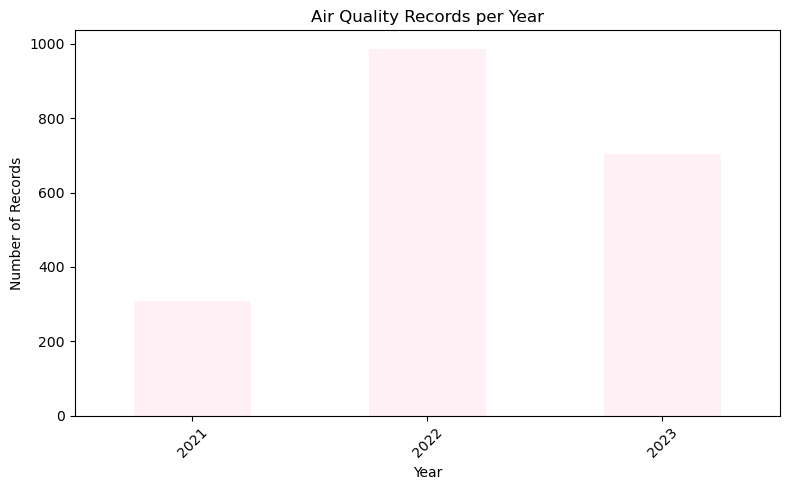

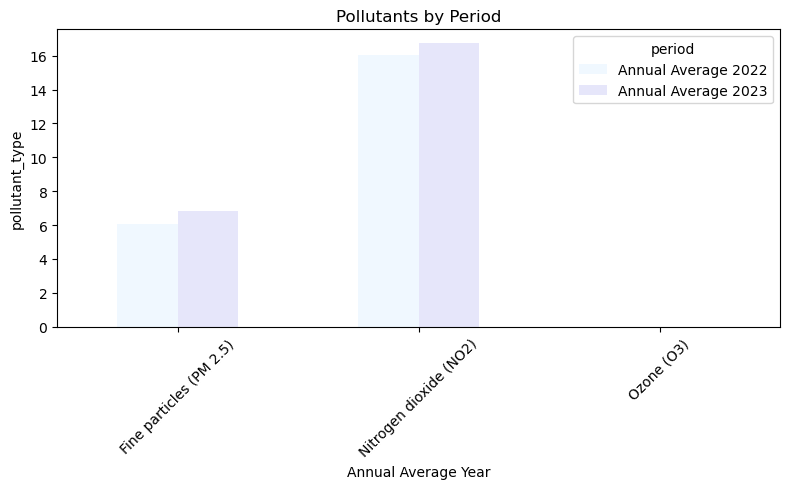

In [60]:

#2.3 E
df["year"] = df["start_date"].dt.year #panda parses start date specifically year 

year_counts = df['year'].value_counts().sort_index()

filtered_df = df[df['period'].isin(["Annual Average 2022", "Annual Average 2023"])]
pollutant_by_period_filtered = filtered_df.groupby(['pollutant_type', 'period'], observed=False)['value'].mean().unstack()
print(pollutant_by_period_filtered)


#2.3 I

print('\nYear Count') #small record amount of 2021 due to under 2000 rows of data

print(year_counts) #small record amount of 2021 due to under 2000 rows of data

year_counts.plot(kind = 'bar', figsize = (8, 5), color = 'lavenderblush')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.title('Air Quality Records per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#no trend determine due to lack of completed and updated data

color_mapping = {
    "Annual Average 2022": "aliceblue",
    "Annual Average 2023": "lavender"}
pollutant_by_period_filtered.plot(kind = 'bar', figsize = (8, 5), color=[color_mapping[col] for col in pollutant_by_period_filtered.columns])
plt.xlabel('Annual Average Year')
plt.ylabel('pollutant_type')
plt.title('Pollutants by Period')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 8. Yearly Trends and Visualization

We look at the number of records per year and visualize pollutant averages for 2022 and 2023.

## 9. Visualization: Monthly Air Quality

We visualize average air quality by month and pollutant type.

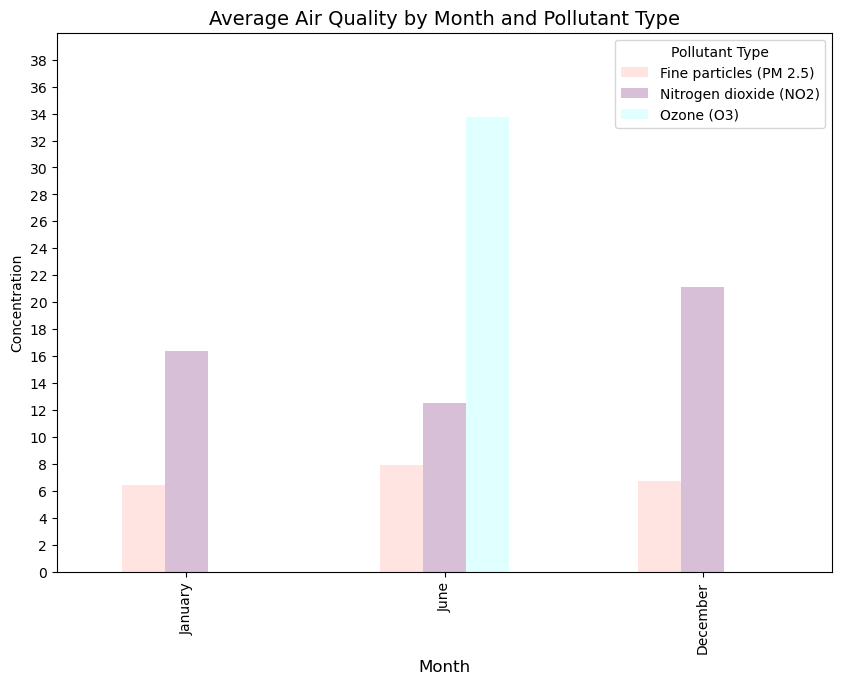

In [92]:
import numpy as np
#Air Quality by day of the week

#Air Quality by the months
#recall from 2.3 c
#Some data are being stacked for easier view causing issues when I plot
color_mapping = {
    "Fine particles (PM 2.5)": "mistyrose",
    "Nitrogen dioxide (NO2)": "thistle", 
    "Ozone (O3)": "lightcyan"
}
monthly_df = monthly_avg.unstack()
month_order = ['January', 'June', 'December']
monthly_df = monthly_df.reindex(month_order)

monthly_df.plot(kind='bar', figsize=(10, 7), color=[color_mapping[col] for col in monthly_df.columns])
plt.ylim(0, 40)
y_ticks = np.arange(0, 40, 2)
plt.yticks(y_ticks)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Concentration', fontsize=10)
plt.title('Average Air Quality by Month and Pollutant Type', fontsize=14)
plt.legend(title='Pollutant Type')
